In [1]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.20.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached grpcio-1.76.0-cp311-cp311-macosx_11_0_universal2.whl.metadata (3.7 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

In [6]:
def iris_mlp(metrics):
    output_activation = "softmax"
    loss = "sparse_categorical_crossentropy"

    input = Input(shape=(4,), name="input")

    x = Dense(
        units=10,
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        activation="relu",
        name="dense_layer1",
    )(input)

    x = Dense(
        units=20,
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        activation="relu",
        name="dense_layer2",
    )(x)

    x = Dense(
        units=10,
        activation="relu",
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        name="dense_layer3",
    )(x)

    output = Dense(units=3, activation=output_activation)(x)

    model = tf.keras.Model(input, output)

    model.compile(optimizer="adam", loss=loss, metrics=metrics)

    return model

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
data_df = iris.frame
data_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]


train_df, val_test_df = train_test_split(
    data_df,
    test_size=0.3, # 30% goes to the combined test/validation pool
    random_state=42
)

val_df, test_df = train_test_split(
    val_test_df,
    test_size=0.5, # 50% of the remaining data
    random_state=42
)

# Training Data
train_labels = np.array(train_df.pop("class"))
train_np = np.array(train_df)

# Validation Data
val_labels = np.array(val_df.pop("class"))
val_np = np.array(val_df)

# Test/Inference Data
test_labels = np.array(test_df.pop("class"))
test_np = np.array(test_df)

In [14]:
EPOCHS = 50
BATCH_SIZE = 32

# Instantiate classifier
classifier = iris_mlp(metrics=["accuracy"])

# Fit classifier
history = classifier.fit(
    x=train_np,
    y=train_labels,
    validation_data=(val_np, val_labels),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=2
)

Epoch 1/50
4/4 - 0s - 121ms/step - accuracy: 0.3524 - loss: 1.1780 - val_accuracy: 0.1364 - val_loss: 1.2664
Epoch 2/50
4/4 - 0s - 6ms/step - accuracy: 0.3524 - loss: 1.1300 - val_accuracy: 0.1364 - val_loss: 1.2039
Epoch 3/50
4/4 - 0s - 6ms/step - accuracy: 0.3524 - loss: 1.0832 - val_accuracy: 0.1364 - val_loss: 1.1503
Epoch 4/50
4/4 - 0s - 5ms/step - accuracy: 0.3524 - loss: 1.0434 - val_accuracy: 0.1364 - val_loss: 1.0968
Epoch 5/50
4/4 - 0s - 5ms/step - accuracy: 0.3524 - loss: 1.0087 - val_accuracy: 0.1364 - val_loss: 1.0508
Epoch 6/50
4/4 - 0s - 6ms/step - accuracy: 0.3524 - loss: 0.9724 - val_accuracy: 0.1818 - val_loss: 1.0095
Epoch 7/50
4/4 - 0s - 6ms/step - accuracy: 0.4857 - loss: 0.9435 - val_accuracy: 0.7273 - val_loss: 0.9691
Epoch 8/50
4/4 - 0s - 6ms/step - accuracy: 0.6476 - loss: 0.9160 - val_accuracy: 0.8182 - val_loss: 0.9326
Epoch 9/50
4/4 - 0s - 6ms/step - accuracy: 0.6857 - loss: 0.8912 - val_accuracy: 0.8636 - val_loss: 0.8961
Epoch 10/50
4/4 - 0s - 6ms/step - a

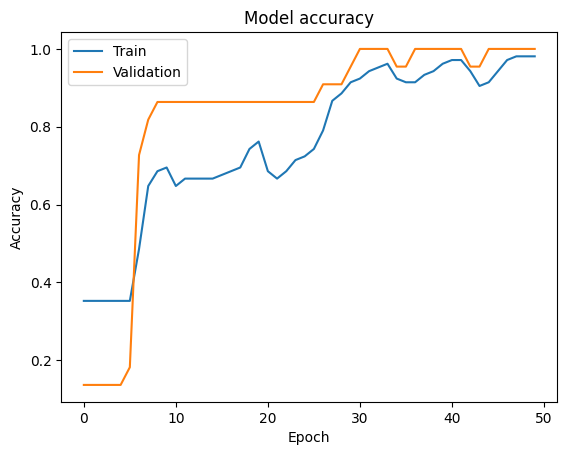

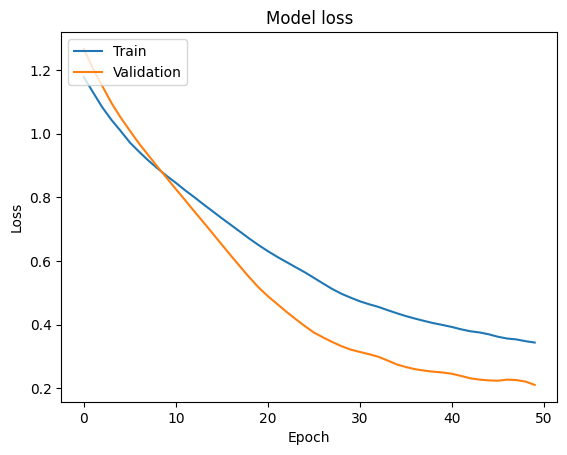

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
import os
import tarfile

os.makedirs("model/1", exist_ok=True)

classifier.save("model/1/model.keras")

with tarfile.open("model.tar.gz", "w:gz") as tar:
    tar.add("model/1", arcname="model/1")

In [18]:
import pandas as pd
import numpy as np
import os

DATA_PATH = "Data"
os.makedirs(DATA_PATH, exist_ok=True)

# Convert the NumPy array directly to a DataFrame for easy CSV export
batch_df = pd.DataFrame(test_np)

batch_df.to_csv(f"{DATA_PATH}/batch-iris-data.csv", header=False, index=False)
print(f"Batch inference data saved to {DATA_PATH}/batch-iris-data.csv (contains {len(test_np)} records).")

Batch inference data saved to Data/batch-iris-data.csv (contains 23 records).
